<a href="https://colab.research.google.com/github/Aadhimozhi/DL_Lab/blob/main/exno_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Split the training data into training and validation sets
split = int(train_images.shape[0] * 0.8)
val_images, val_labels = train_images[split:], train_labels[split:]
train_images, train_labels = train_images[:split], train_labels[:split]

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tfl.Rescaling(1./255),
    tfl.RandomFlip(mode="horizontal"),
    tfl.RandomRotation(factor=0.1),
    tfl.RandomContrast(factor=(0.2, 0.9)),
    tfl.RandomZoom(height_factor=(0.1, 0.3))
])

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 129ms/step - accuracy: 0.2674 - loss: 1.9245 - val_accuracy: 0.5118 - val_loss: 1.4074
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 116ms/step - accuracy: 0.5298 - loss: 1.3406 - val_accuracy: 0.5738 - val_loss: 1.2568
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.5743 - loss: 1.2300 - val_accuracy: 0.5969 - val_loss: 1.1805
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.6000 - loss: 1.1674 - val_accuracy: 0.6047 - val_loss: 1.1663
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 117ms/step - accuracy: 0.6186 - loss: 1.1241 - val_accuracy: 0.6081 - val_loss: 1.1346
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.6274 - loss: 1.0964 - val_accuracy: 0.6216 - val_loss: 1.1003
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.6355 - loss: 1.0644 - val_accuracy: 0.6332 - val_loss: 1.0748
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 117ms/step - accuracy: 0.6440 - loss: 

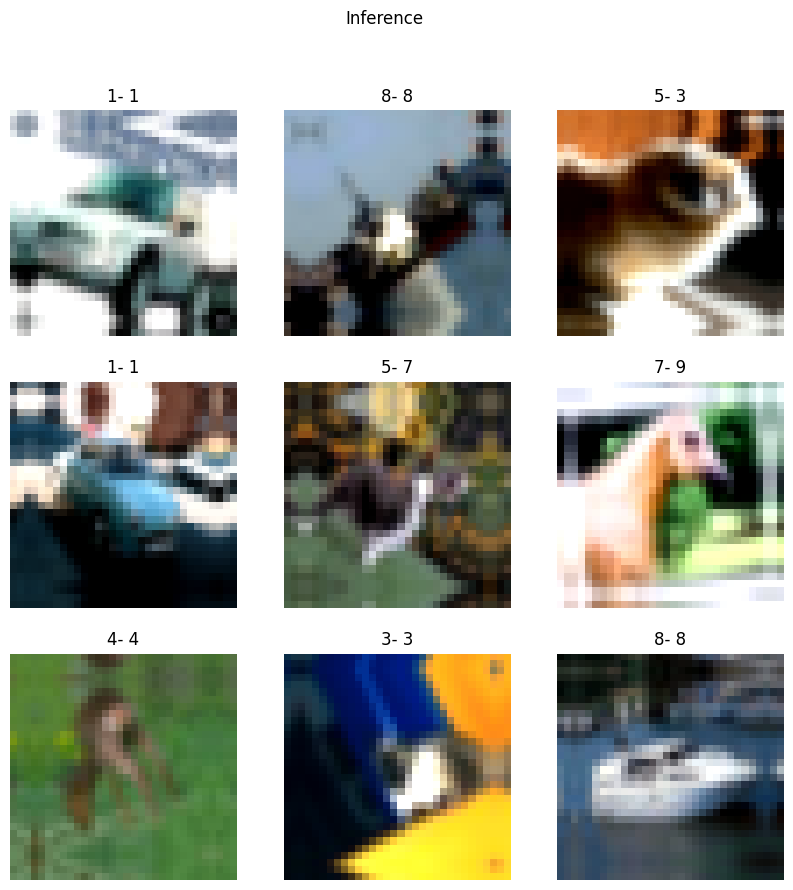

In [ ]:

def preprocess(x, y):
    return data_augmentation(x), tf.one_hot(tf.squeeze(y), 10)

# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).map(preprocess).batch(64)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).map(preprocess).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).map(preprocess).batch(64)



# Load the pre-trained VGG19 model
base_model = tf.keras.applications.VGG19(include_top=False, weights="imagenet", input_shape=(32, 32, 3))

# Freeze the early layers of the base model
for layer in base_model.layers[:-5]:
    layer.trainable = False



# Create the final model
model = tf.keras.Sequential([
    base_model,
    tfl.Flatten(),
    tfl.Dense(256, activation="relu"),
    tfl.Dense(128, activation="relu"),
    tfl.Dense(64, activation="relu"),
    tfl.Dense(10, activation="softmax")
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.TensorBoard(log_dir="logs")
    ]
)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Visualize predictions
image, label = next(iter(val_ds))
images = image.numpy()[:9]
res = tf.argmax(model(image), axis=-1).numpy()
label_numpy = tf.argmax(label, axis=-1).numpy()

plt.figure(figsize=(10, 10))
plt.suptitle("Inference")
for i, (img, r) in enumerate(zip(images, res)):
    plt.subplot(3, 3, i + 1)
    plt.title(f"{label_numpy[i]}- {r}")
    plt.imshow(img)
    plt.axis("off")
plt.show()